# Hand Written Digit Prediction

## Objective : To analyse the prediction of Hand Written Digit by using Random Forest Classifier

## Import Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import Data

In [3]:
from sklearn.datasets import load_digits

In [4]:
df = load_digits()

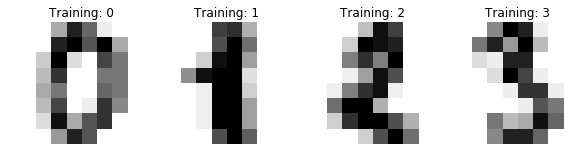

In [7]:
_, axes = plt.subplots(nrows = 1, ncols=4, figsize=(10,3))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

## Data Preprocessing

In [11]:
df.images.shape

(1797, 8, 8)

In [12]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [13]:
df.images[0].shape

(8, 8)

In [14]:
len(df.images)

1797

In [16]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [17]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [18]:
data[0].shape

(64,)

In [19]:
data.shape

(1797, 64)

## Scaling image data

In [20]:
data.min()

0.0

In [21]:
data.max()

16.0

In [22]:
data = data/16

In [23]:
data.min()

0.0

In [24]:
data.max()

1.0

In [25]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

## Train Test Split

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, df.target, train_size=0.3)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((539, 64), (1258, 64), (539,), (1258,))

## Modeling

In [28]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

## Model Evaluation

In [29]:
model.fit(X_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Prediction

In [30]:
y_pred = model.predict(X_test)

In [31]:
y_pred

array([6, 1, 3, ..., 1, 9, 5])

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
     

In [34]:

confusion_matrix(y_test,y_pred)
     

array([[130,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  1, 120,   5,   1,   0,   0,   1,   0,   0,   1],
       [  1,   2, 122,   0,   0,   0,   0,   0,   2,   0],
       [  0,   3,   2, 122,   0,   3,   1,   0,   2,   2],
       [  0,   4,   0,   0, 113,   1,   0,   1,   1,   0],
       [  3,   0,   0,   4,   2, 110,   1,   0,   0,   5],
       [  2,   0,   1,   0,   2,   2, 119,   0,   1,   0],
       [  2,   1,   0,   0,   0,   0,   0, 107,   3,   5],
       [  1,   3,   2,   1,   4,   1,   2,   1, 104,   1],
       [  0,   6,   0,   4,   0,   2,   0,   1,   2, 111]], dtype=int64)

In [35]:
accuracy_score(y_test,y_pred)

0.9205087440381559

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       131
           1       0.86      0.93      0.90       129
           2       0.92      0.96      0.94       127
           3       0.92      0.90      0.91       135
           4       0.93      0.94      0.93       120
           5       0.92      0.88      0.90       125
           6       0.96      0.94      0.95       127
           7       0.97      0.91      0.94       118
           8       0.90      0.87      0.89       120
           9       0.89      0.88      0.88       126

   micro avg       0.92      0.92      0.92      1258
   macro avg       0.92      0.92      0.92      1258
weighted avg       0.92      0.92      0.92      1258



## Explaination
The Project allows to analyze and predict the outcome of the number fed into the model.